In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('scaled_data.csv')

In [3]:
df

,Unnamed: 0,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,total_spent,parent,total_accepted_coupons,number_of_total_purchases
0,0,-0.89438,1.347635,0.288513,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,...,-0.279482,-0.262362,-0.116616,-0.095001,2.386338,1.016868,1.680176,-1.264308,-0.438933,1.319340
1,1,-0.89438,1.347635,-0.262438,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,1.273264,-0.962202,1.395139,-0.438933,-1.155857
2,2,-0.89438,-0.742041,0.917992,-0.824939,-0.930615,-0.798467,0.362159,0.572177,-0.177201,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,0.333146,0.282541,-1.264308,-0.438933,0.798246
3,3,-0.89438,-0.742041,-1.182621,1.032627,-0.930615,-0.798467,-0.871064,-0.560893,-0.651409,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,-1.290693,-0.918994,0.065416,-0.438933,-0.895310
4,4,0.57070,-0.742041,0.295754,1.032627,-0.930615,1.550344,-0.389661,0.421101,-0.217088,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,-1.034298,-0.305762,0.065416,-0.438933,0.537699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,2231,-0.89438,-0.742041,0.432628,-0.824939,0.905974,-0.107640,1.203128,0.421101,0.066551,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,0.162216,1.221499,0.065416,-0.438933,0.407425
2232,2232,0.57070,-0.742041,0.563008,2.890194,0.905974,0.237773,0.302727,-0.661610,-0.607091,...,-0.279482,3.811532,-0.116616,-0.095001,-0.419052,1.956986,-0.269201,2.724862,1.034721,0.928519
2233,2233,-0.89438,1.347635,0.234465,-0.824939,-0.930615,1.446720,1.794481,0.546997,0.221666,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,-1.034298,1.055312,-1.264308,1.034721,0.537699
2234,2234,0.57070,-0.742041,0.807372,-0.824939,0.905974,-1.420212,0.368102,0.093769,0.208371,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,1.102333,0.393886,0.065416,-0.438933,1.058793


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,total_spent,parent,total_accepted_coupons,number_of_total_purchases
0,-0.89438,1.347635,0.288513,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,2.461068,...,-0.279482,-0.262362,-0.116616,-0.095001,2.386338,1.016868,1.680176,-1.264308,-0.438933,1.319340
1,-0.89438,1.347635,-0.262438,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,1.273264,-0.962202,1.395139,-0.438933,-1.155857


In [6]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'total_spent', 'parent',
       'total_accepted_coupons', 'number_of_total_purchases'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Education                  2236 non-null   float64
 1   Marital_Status             2236 non-null   float64
 2   Income                     2236 non-null   float64
 3   Kidhome                    2236 non-null   float64
 4   Teenhome                   2236 non-null   float64
 5   Recency                    2236 non-null   float64
 6   MntWines                   2236 non-null   float64
 7   MntFruits                  2236 non-null   float64
 8   MntMeatProducts            2236 non-null   float64
 9   MntFishProducts            2236 non-null   float64
 10  MntSweetProducts           2236 non-null   float64
 11  MntGoldProds               2236 non-null   float64
 12  NumDealsPurchases          2236 non-null   float64
 13  NumWebPurchases            2236 non-null   float

In [8]:
df.shape

(2236, 29)

C:\Users\User\AppData\Local\Temp\ipykernel_5480\1025562119.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


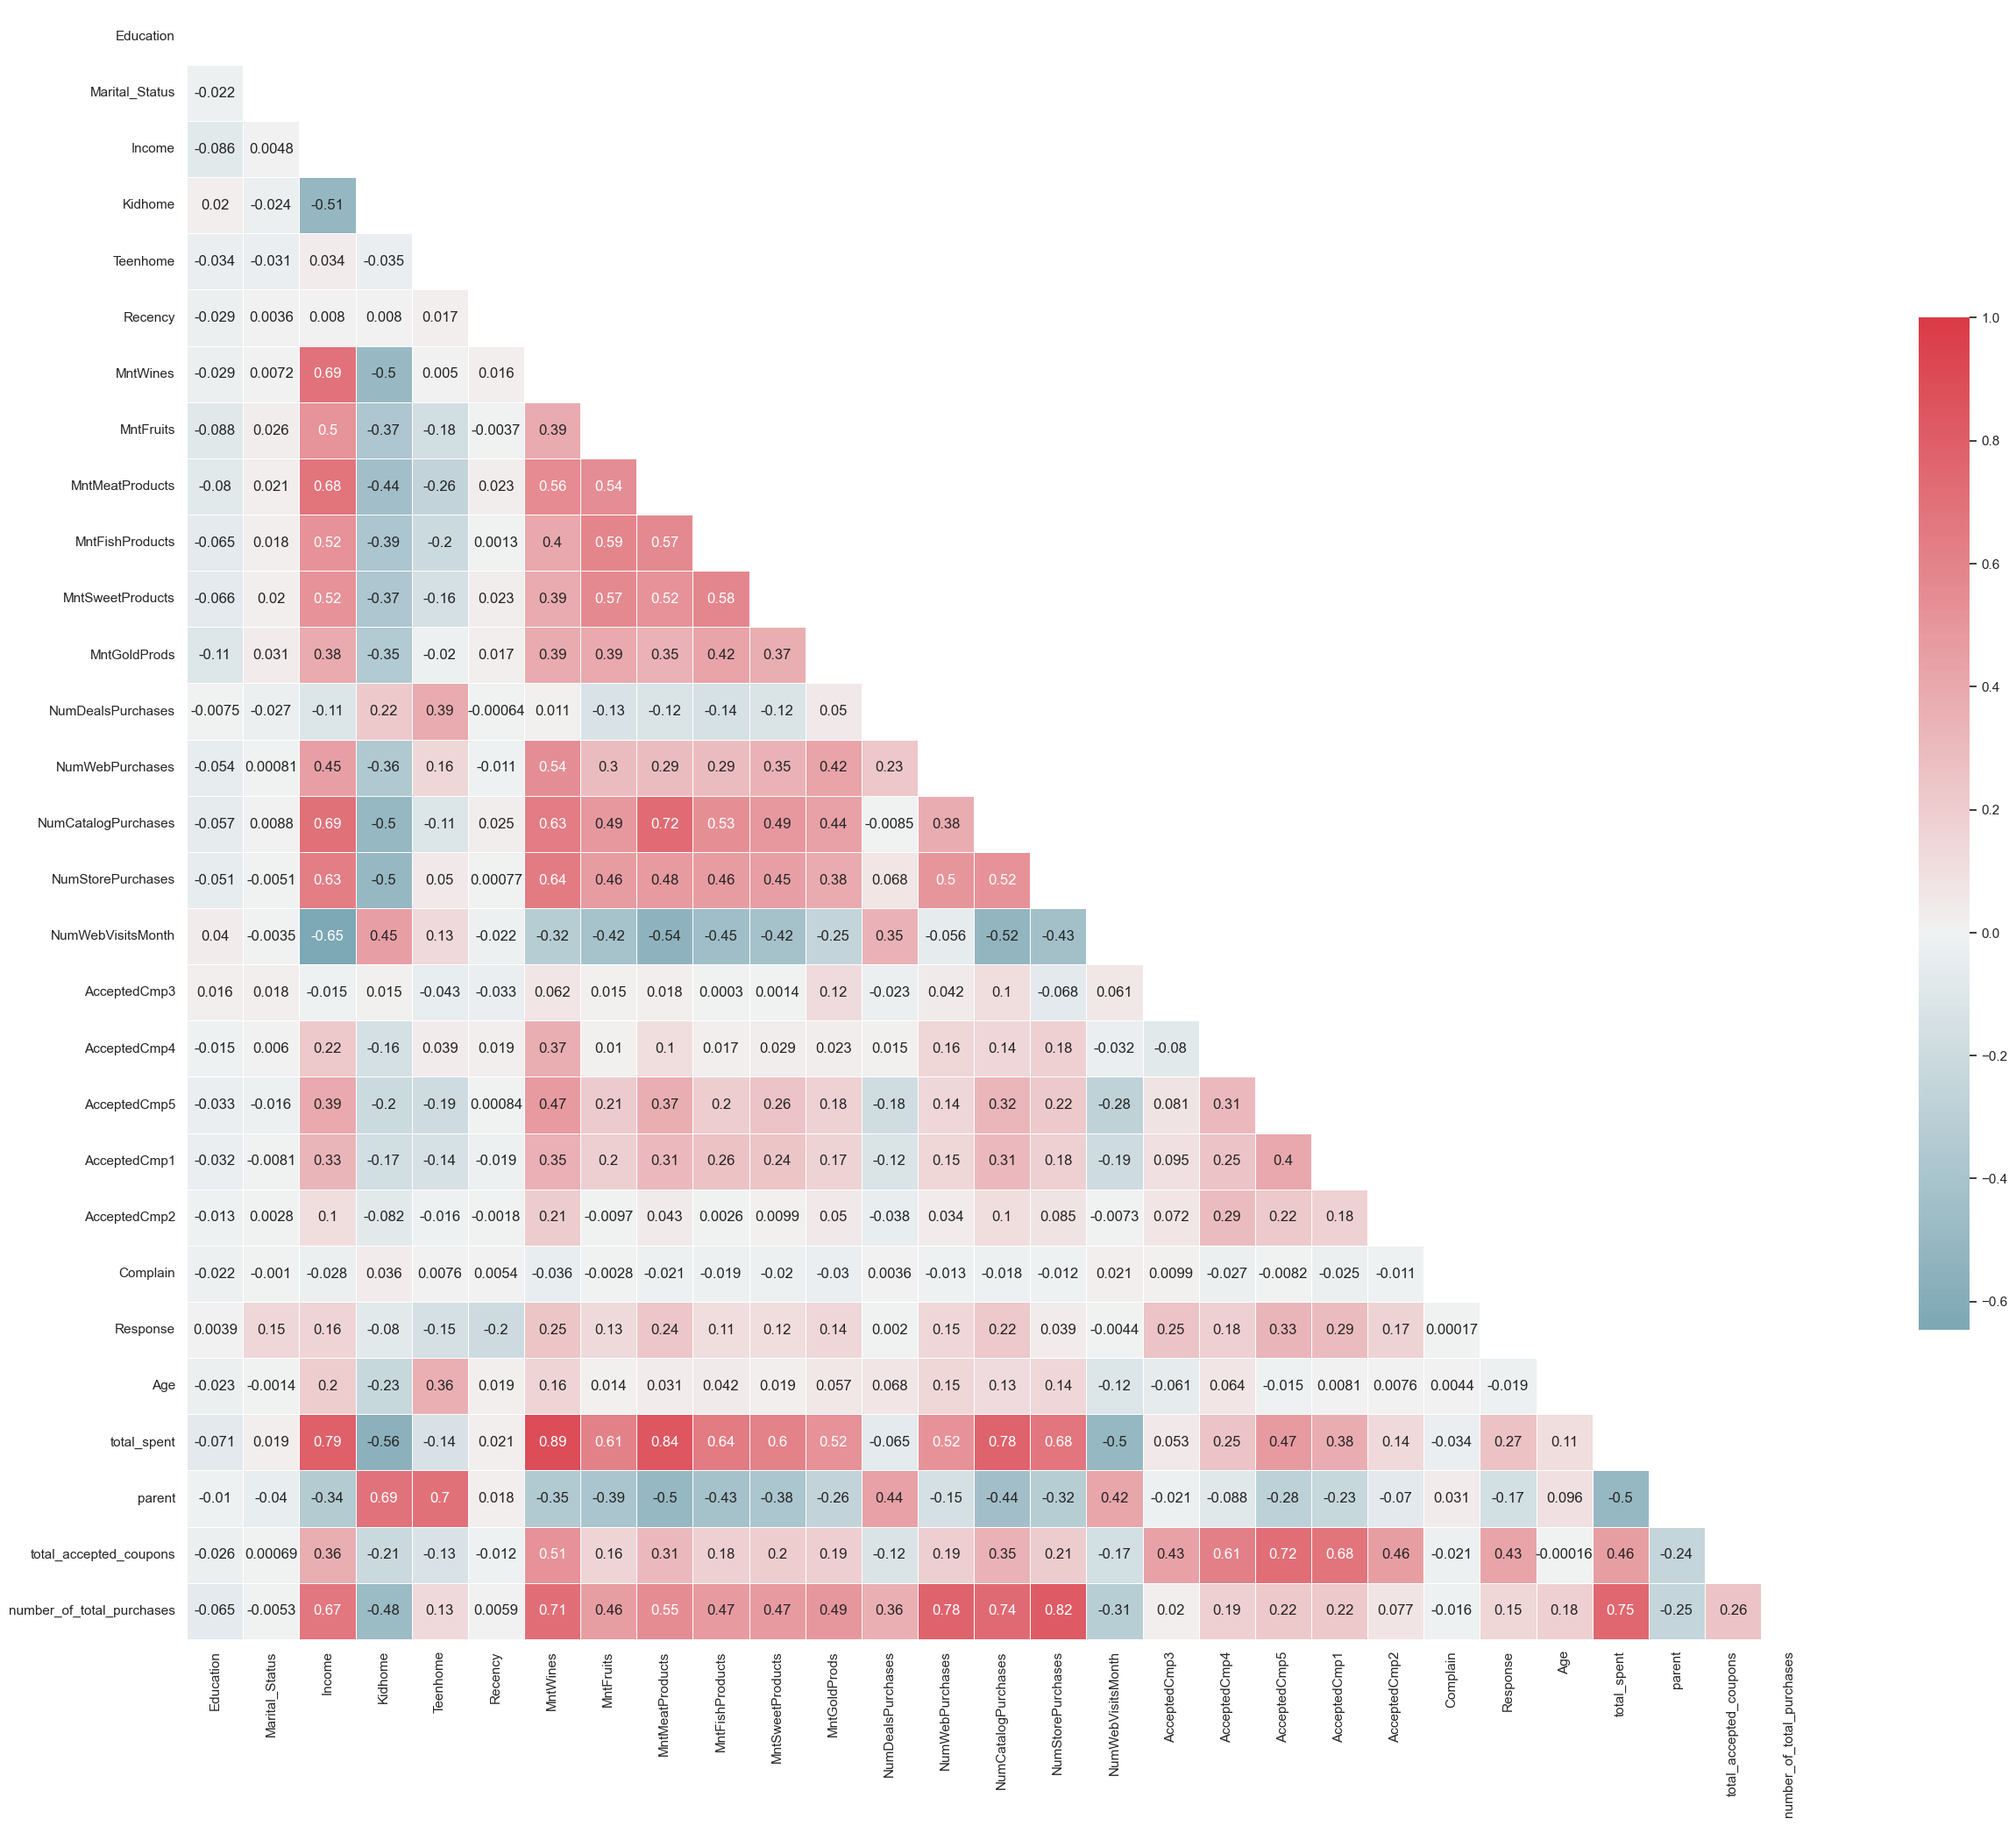

In [13]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

## New df

In [22]:
new=df.copy()

In [28]:
new.drop(([ 'Age', 'total_spent', 'parent','total_accepted_coupons', 'number_of_total_purchases']), axis=1, inplace=True)

In [29]:
pca=PCA()

In [30]:
pca.fit(new)

PCA()

In [31]:
(pca.explained_variance_ratio_).cumsum()*100

array([ 27.85524253,  35.79476783,  43.69512768,  49.43689597,
        53.84491411,  58.10876486,  62.27802888,  66.32229749,
        70.19919968,  73.67626871,  76.77404571,  79.64017629,
        82.16549938,  84.596299  ,  86.95342782,  89.24690749,
        91.08937011,  92.88004118,  94.53320102,  96.12030598,
        97.42764085,  98.450559  ,  99.30345699, 100.        ])

In [35]:
pca = PCA(n_components=13, random_state=42)

In [36]:
pca.fit(new)

PCA(n_components=13, random_state=42)

In [37]:
pca_df= pd.DataFrame(pca.transform(new))

In [38]:
pca_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.737209,-0.260885,-0.158458,2.634478,0.935189,-1.229037,-0.485168,-0.323065,-1.353188,0.456805,0.446896,-0.937354,-0.285918
1,-2.382721,-0.396781,0.095100,-0.175188,0.557237,-1.514271,0.091105,-0.393250,0.654711,-0.830003,0.607218,0.695969,0.086714
2,1.685118,-0.461312,-1.031490,-0.194895,-0.376090,0.063648,0.602287,-1.049857,0.525636,0.916557,-0.873848,-0.627580,-0.436573
3,-2.477465,-0.914818,0.365819,-0.054703,0.154556,0.313970,0.479273,-1.430236,0.039221,0.284754,0.010783,-0.422790,-0.042188
4,-0.392349,-0.057927,-0.832408,-0.215286,0.555736,1.235637,-0.675631,0.301866,-1.598226,-0.092426,0.927807,-0.412061,-0.241003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,2.382551,1.022974,-1.882106,1.002844,0.688253,0.579288,-0.365078,-0.746439,0.825934,1.434000,-1.681023,0.502709,1.702918
2232,-1.046614,2.618596,0.552326,0.242408,0.290083,1.752335,-0.086484,-0.886639,-2.235361,-1.785409,0.518195,2.728496,0.239866
2233,1.588429,0.693990,0.691035,-2.319581,1.225612,-1.761766,-0.651204,0.562463,-0.541535,0.389104,-0.983181,-1.707313,-1.919459
2234,1.711540,0.357511,-1.328744,-0.332640,-1.742788,0.181803,0.820845,-0.208602,0.870395,0.098809,0.140813,0.209130,0.172725


In [39]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pca_df)
    Sum_of_squared_distances.append(km.inertia_)

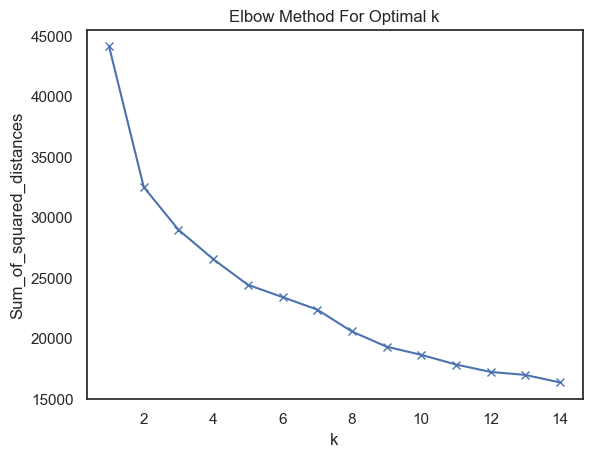

In [40]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [41]:
## maybe 3 clusters

### Try some more time

In [42]:
cust=df.copy()

In [43]:
cust

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,total_spent,parent,total_accepted_coupons,number_of_total_purchases
0,-0.89438,1.347635,0.288513,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,2.461068,...,-0.279482,-0.262362,-0.116616,-0.095001,2.386338,1.016868,1.680176,-1.264308,-0.438933,1.319340
1,-0.89438,1.347635,-0.262438,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,1.273264,-0.962202,1.395139,-0.438933,-1.155857
2,-0.89438,-0.742041,0.917992,-0.824939,-0.930615,-0.798467,0.362159,0.572177,-0.177201,1.344595,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,0.333146,0.282541,-1.264308,-0.438933,0.798246
3,-0.89438,-0.742041,-1.182621,1.032627,-0.930615,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,-1.290693,-0.918994,0.065416,-0.438933,-0.895310
4,0.57070,-0.742041,0.295754,1.032627,-0.930615,1.550344,-0.389661,0.421101,-0.217088,0.154911,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,-1.034298,-0.305762,0.065416,-0.438933,0.537699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,-0.89438,-0.742041,0.432628,-0.824939,0.905974,-0.107640,1.203128,0.421101,0.066551,0.081700,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,0.162216,1.221499,0.065416,-0.438933,0.407425
2232,0.57070,-0.742041,0.563008,2.890194,0.905974,0.237773,0.302727,-0.661610,-0.607091,-0.687019,...,-0.279482,3.811532,-0.116616,-0.095001,-0.419052,1.956986,-0.269201,2.724862,1.034721,0.928519
2233,-0.89438,1.347635,0.234465,-0.824939,-0.930615,1.446720,1.794481,0.546997,0.221666,-0.101329,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,-1.034298,1.055312,-1.264308,1.034721,0.537699
2234,0.57070,-0.742041,0.807372,-0.824939,0.905974,-1.420212,0.368102,0.093769,0.208371,0.777208,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,1.102333,0.393886,0.065416,-0.438933,1.058793


C:\Users\User\AppData\Local\Temp\ipykernel_5480\4213636738.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(cust.corr(), dtype=np.bool)


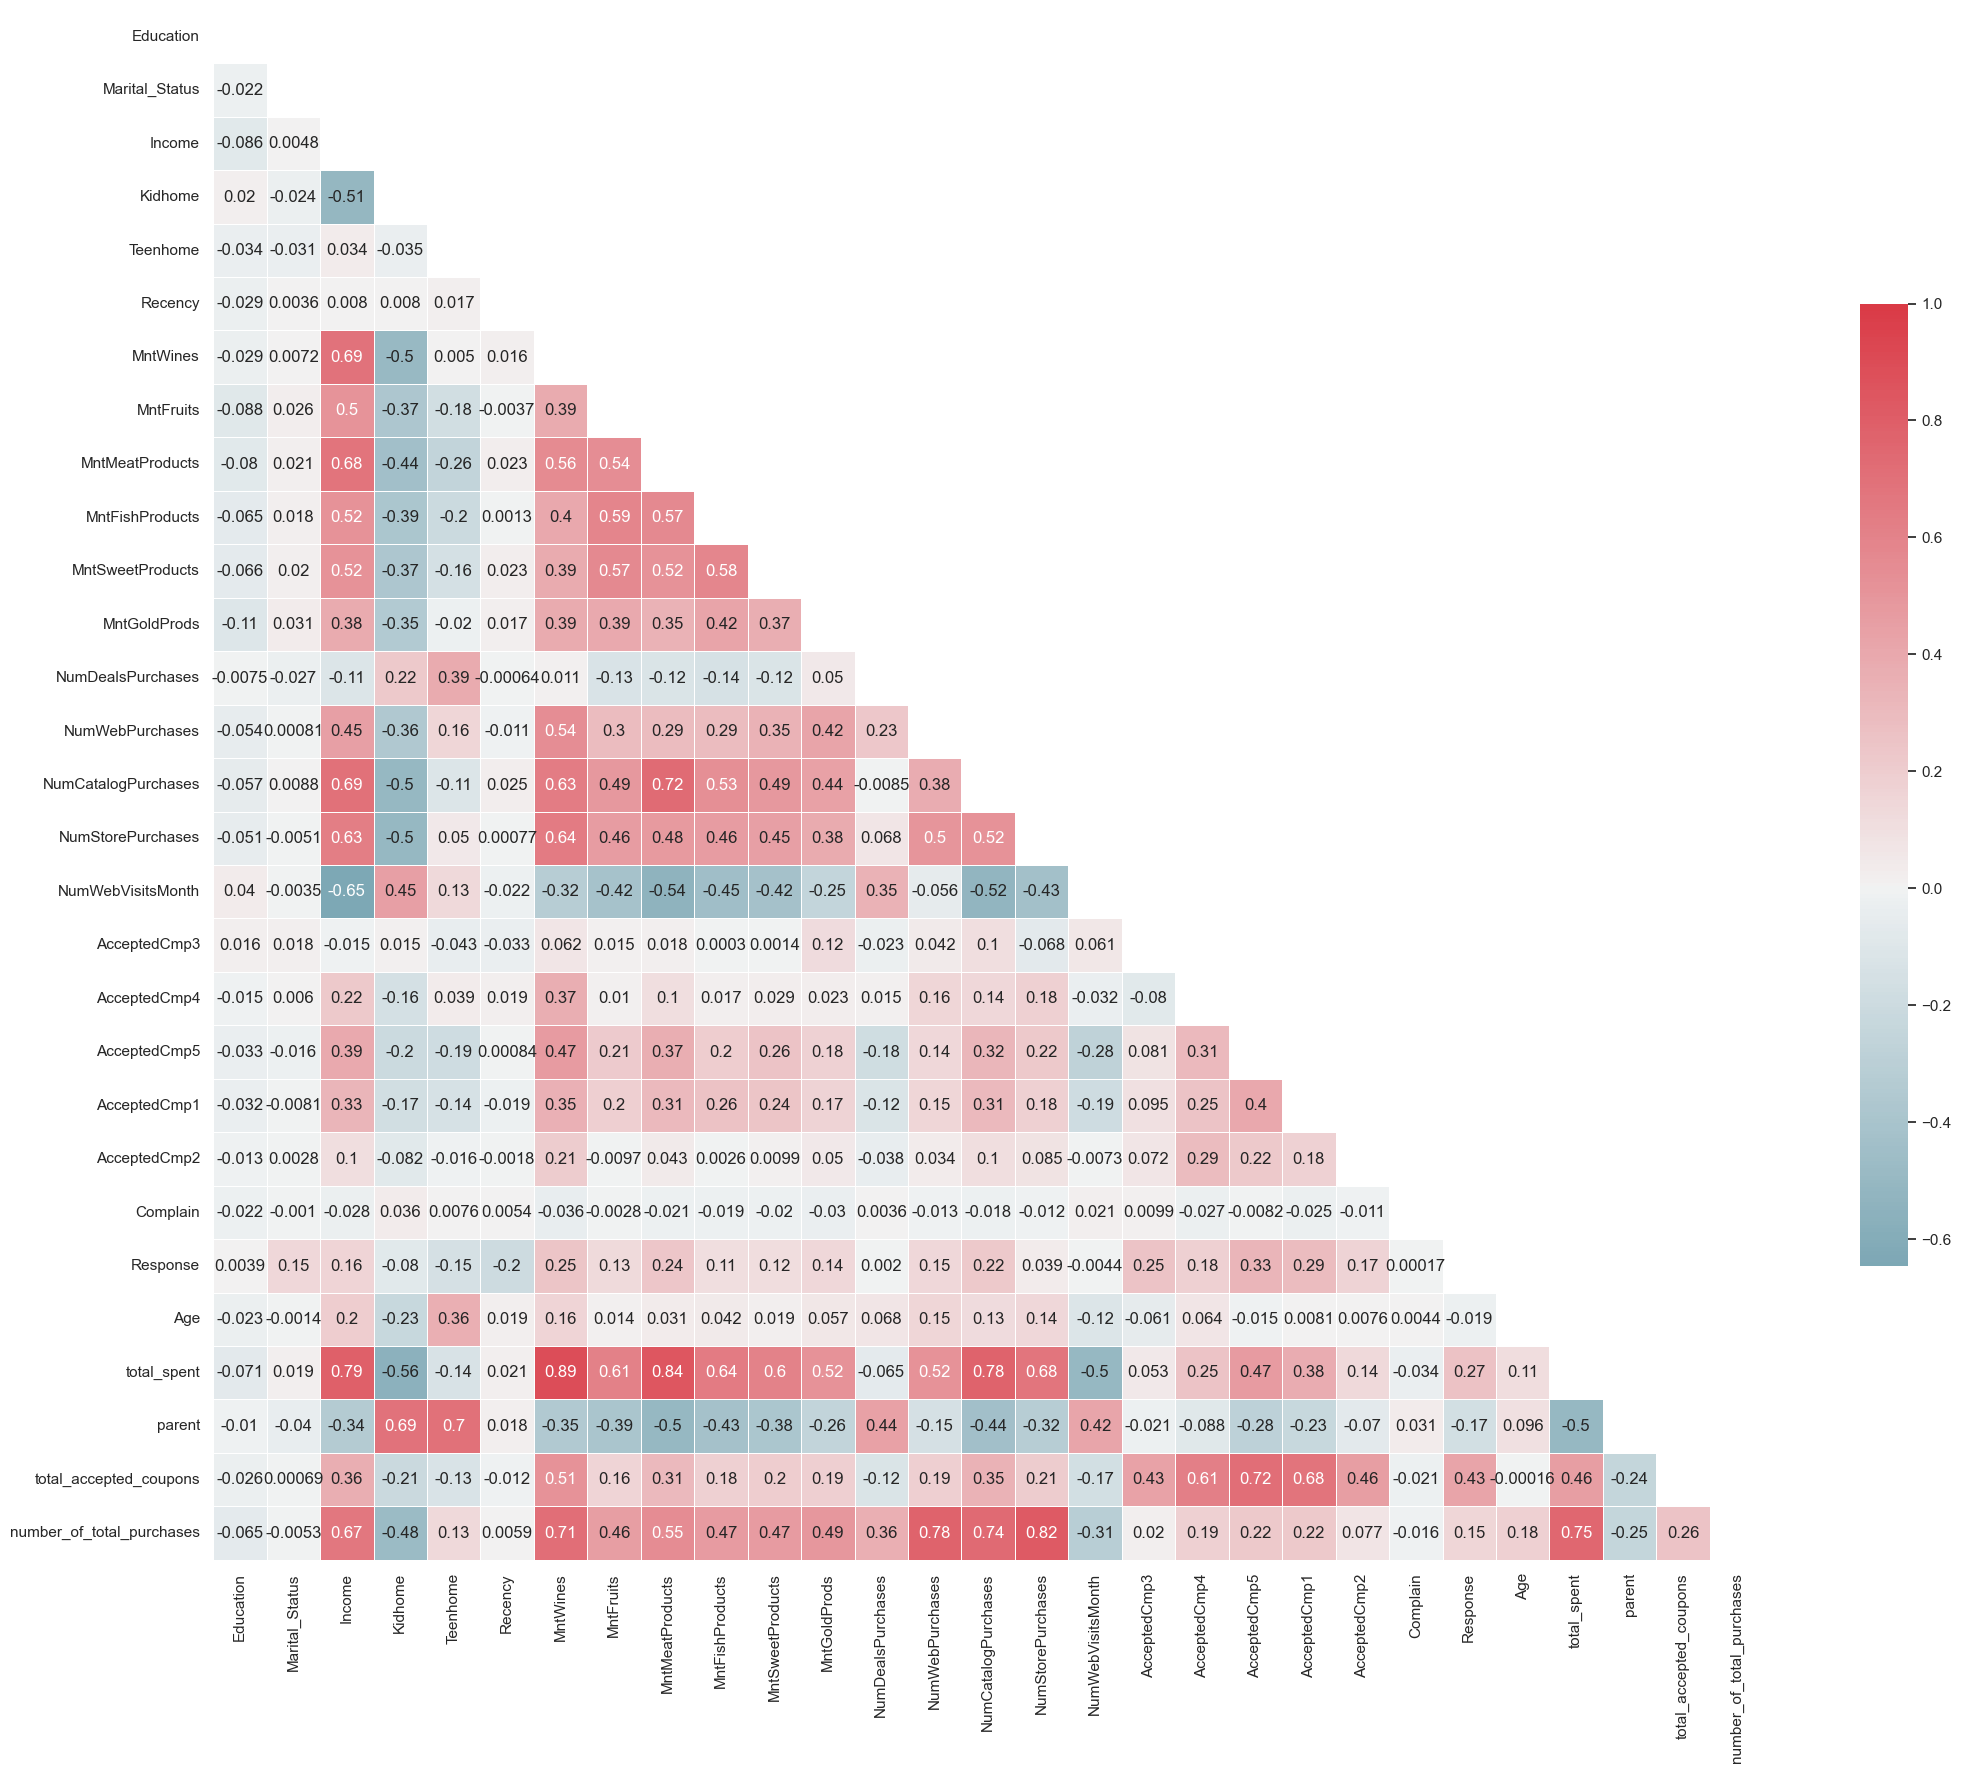

In [45]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(cust.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cust.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

In [46]:
cust.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'total_spent', 'parent',
       'total_accepted_coupons', 'number_of_total_purchases'],
      dtype='object')

In [48]:
cust.drop(['Income', 'parent', 'total_spent', 'number_of_total_purchases','total_accepted_coupons','Response'],axis=1,inplace=True)

In [49]:
pca=PCA()

In [50]:
pca.fit(cust)

PCA()

In [51]:
(pca.explained_variance_ratio_).cumsum()*100

array([ 25.82818619,  34.61995671,  42.08514457,  47.67292599,
        52.26803571,  56.79780999,  61.17651622,  65.45049377,
        69.64104469,  73.24149554,  76.44853928,  79.56842203,
        82.20335534,  84.73224247,  87.22968546,  89.66388514,
        91.6153609 ,  93.47912374,  95.12837907,  96.70790535,
        98.07716264,  99.14416805, 100.        ])

In [52]:
pca = PCA(n_components=12, random_state=42)

In [53]:
pca.fit(cust)

PCA(n_components=12, random_state=42)

In [54]:
pca_df= pd.DataFrame(pca.transform(cust))

In [55]:
pca_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,3.687076,0.120699,-1.641078,0.899110,-0.869080,0.677717,-1.054109,0.327529,0.181071,-0.308194,0.810024,-0.112650
1,-2.335766,0.132782,-0.127447,-1.128049,-0.258679,1.548967,-0.752827,0.541817,-0.732468,-0.874102,0.833361,0.231225
2,1.556349,-0.059922,-0.874250,-0.301349,0.145156,-0.411395,0.366625,0.671801,-1.061528,0.859649,-0.888432,-0.615311
3,-2.249123,-1.362967,0.166379,0.533356,-0.476011,-0.736927,0.380924,0.578492,-1.178403,0.286773,-0.306955,0.312167
4,-0.520922,-0.304021,-0.498607,0.962433,-1.101569,-1.578666,0.248734,-1.072863,1.019203,0.039305,0.520847,0.504678
...,...,...,...,...,...,...,...,...,...,...,...,...
2231,2.471278,1.472972,-1.402580,1.106404,-0.261804,0.282490,0.165450,-0.418464,-1.077839,1.060505,-0.773476,-2.026012
2232,-1.181830,2.611998,1.368307,1.075827,-0.060011,-0.812542,0.920262,-0.652020,-0.175872,-3.457958,2.376424,-1.173535
2233,1.590177,0.033846,1.828938,-0.783956,-2.131606,-0.309995,-1.586580,0.508898,1.049389,0.769609,-2.009031,0.720164
2234,1.649779,1.130285,-0.943738,-1.052691,1.629813,-0.338801,0.606627,0.576582,-0.520605,0.292621,0.098045,0.160147


In [56]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pca_df)
    Sum_of_squared_distances.append(km.inertia_)

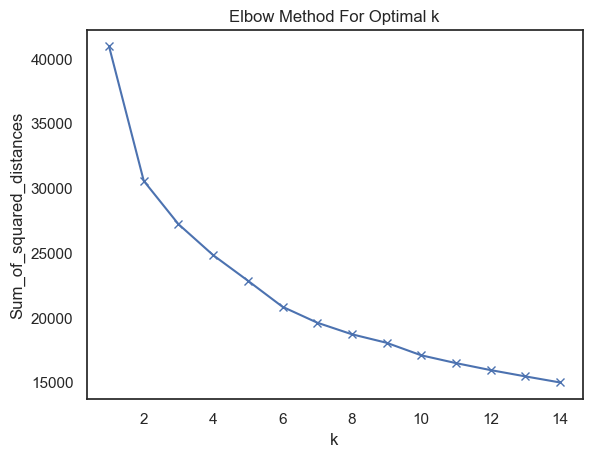

In [57]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()